### Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df=pd.read_csv('2015_trip_data.csv')
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [67]:
start_day=[pd.to_datetime(x).dayofweek for x in df.starttime]
stop_day=[pd.to_datetime(x).dayofweek for x in df.stoptime]

In [68]:
df['startday']=start_day
df['stopday']=stop_day

In [69]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,startday,stopday
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,0,0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,0,0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,0,0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,0,0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,0,0


In [70]:
groupby_day_from = df.groupby(['from_station_id','startday']).size()
groupby_day_from.head()

from_station_id  startday
BT-01            0           806
                 1           724
                 2           679
                 3           801
                 4           921
dtype: int64

In [71]:
groupby_day_to = df.groupby(['to_station_id','stopday']).size()
groupby_day_to.head()

to_station_id  stopday
BT-01          0          791
               1          675
               2          696
               3          791
               4          853
dtype: int64

In [72]:
def clean_row(df, indexes, level):
    for idx in indexes:
        df=df.drop(idx, level=level)
    return df

In [73]:
groupby_day_from=clean_row(groupby_day_from, ['Pronto shop'], 'from_station_id')
groupby_day_to=clean_row(groupby_day_to, ['Pronto shop'], 'to_station_id')

In [74]:
groupby_dayofweek_netcount=pd.DataFrame(groupby_day_from-groupby_day_to)

In [75]:
groupby_dayofweek_netcount.head()

0
from_station_id startday    
BT-01           0         15
                1         49
                2        -17
                3         10
                4         68

In [76]:
#Turn multi-level index into columns
groupby_dayofweek_netcount.reset_index(inplace=True)

In [77]:
groupby_dayofweek_netcount.columns

Index(['from_station_id', 'startday', 0], dtype='object')

In [78]:
groupby_dayofweek_netcount.columns=['Station_id', 'Dayofweek', 'Net count (to-from)']

In [79]:
groupby_dayofweek_netcount.head()

,Station_id,Dayofweek,Net count (to-from)
0,BT-01,0,15
1,BT-01,1,49
2,BT-01,2,-17
3,BT-01,3,10
4,BT-01,4,68


In [80]:
count = df.groupby(['startday'])['from_station_id'].nunique()
count

startday
0    54
1    55
2    54
3    54
4    54
5    54
6    54
Name: from_station_id, dtype: int64

In [81]:
groupby_dayofweek_netcount['Average net count']=groupby_dayofweek_netcount['Net count (to-from)']/54

### 2-pts: create a dataframe with station counts averages by day-of-week

In [82]:
groupby_dayofweek_netcount.head(10)

,Station_id,Dayofweek,Net count (to-from),Average net count
0,BT-01,0,15,0.277778
1,BT-01,1,49,0.907407
2,BT-01,2,-17,-0.314815
3,BT-01,3,10,0.185185
4,BT-01,4,68,1.259259
5,BT-01,5,7,0.129630
6,BT-01,6,-47,-0.870370
7,BT-03,0,43,0.796296
8,BT-03,1,81,1.500000
9,BT-03,2,95,1.759259


### 1-pt: structure the 7 day-of-week plots as subplots
### 1-pt: label the plots by day-of-week
### 1-pt: label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

In [83]:
names=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
titles={}
for i in range(len(names)):
    titles[i]='Station Net Counts' + ' ' + names[i]

In [84]:
def plot_bar(df, column, num, opts):
    df = df.set_index(['Station_id'])
    n_groups=len(df.index)
    raw_index=np.arange(n_groups)
    rects=plt.bar(raw_index, df[column])
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(raw_index, df.index, rotation=90)
    else:
        labels=['' for x in df.index]
        plt.xticks(raw_index, labels)
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'][num])    

In [85]:
import math
def plot_barN(df, total_plots, num_columns, opts, column):
    num_rows=math.ceil(total_plots/num_columns)
    idx=0
    local_opts=dict(opts)
    fig=plt.figure(figsize=(20, 16))
    if total_plots%num_columns==1:
        flag=True
    for i in range(total_plots):
        idx+=1
        local_opts['xticks']=False
        local_opts['xlabel']=''
        local_opts['ylabel']=''
        if flag and math.ceil(idx/num_columns)==num_rows-1 and idx%num_columns==0:
            local_opts['xticks']=True
            local_opts['xlabel']=opts['xlabel']         
        if math.ceil(idx/num_columns)==num_rows:
            local_opts['xticks']=True
            local_opts['xlabel']=opts['xlabel']            
        if idx%num_columns==1:
            local_opts['ylabel']=opts['ylabel']
        plt.subplot(num_rows, num_columns, idx)
        plot_bar(df.loc[df['Dayofweek']==i], column, i, local_opts)   

### Plot net count of all stations of 7 days of week

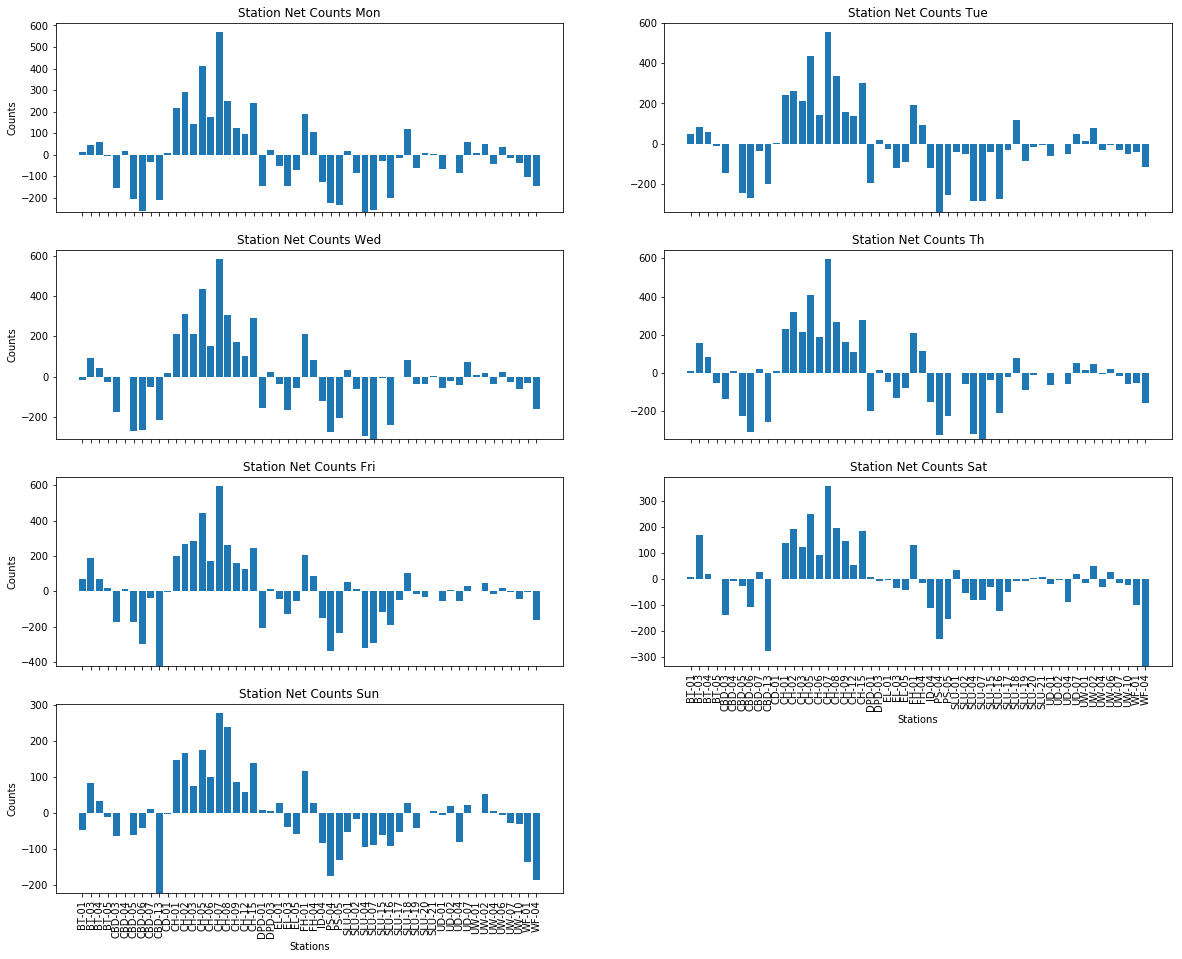

In [86]:
opts={'xlabel': 'Stations', 'ylabel': 'Counts', 'xticks': True, 'title': titles}
plot_barN(groupby_dayofweek_netcount, 7, 2, opts, 'Net count (to-from)')

### Plot average net count of all stations of 7 days of week of a year

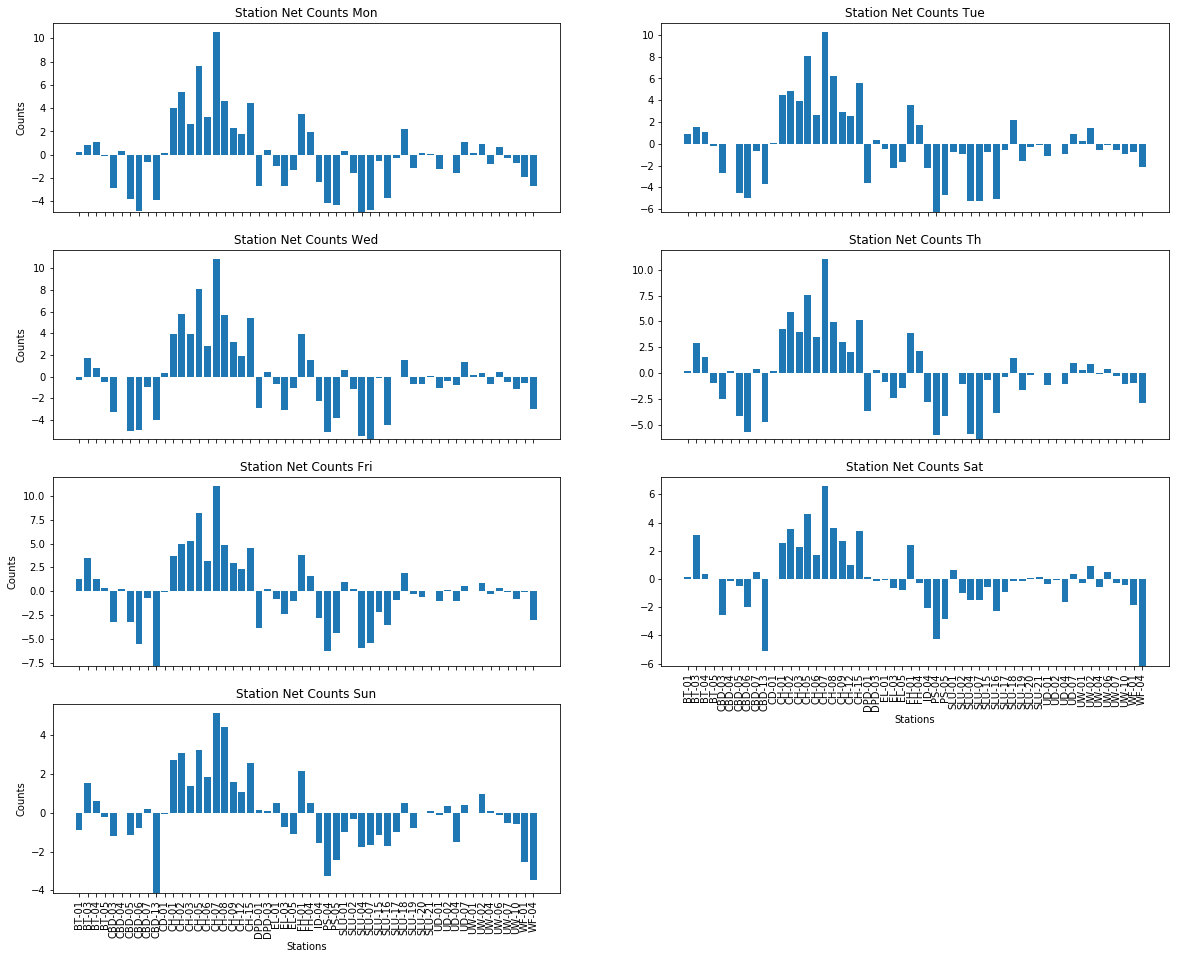

In [87]:
plot_barN(groupby_dayofweek_netcount, 7, 2, opts, 'Average net count')